In [1]:
import os
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
eeci_colors = ['#E50068','#574145','#009070','#7500a0','#ffbfeb','#00C8A4','#a800e5','#4d4e51','#BEA5A9','#ebf1f7']

In [3]:
results_file = os.path.join('..','results', 'prediction_tests_same-train-test.csv')
comp_results = pd.read_csv(results_file)

In [4]:
print(comp_results)

           Model Name   Train Building  Forecast Time (s)  Tau (hrs)   Metric  \
0                 TFT  same-train-test       38646.608305         48   gmnMAE   
1                 TFT  same-train-test       38646.608305         48  gmnRMSE   
2               NHiTS  same-train-test       26430.631230         48   gmnMAE   
3               NHiTS  same-train-test       26430.631230         48  gmnRMSE   
4              DeepAR  same-train-test      127783.076749         48   gmnMAE   
5              DeepAR  same-train-test      127783.076749         48  gmnRMSE   
6   analysis\linear_0  same-train-test          37.853634         48   gmnMAE   
7   analysis\linear_0  same-train-test          37.853634         48  gmnRMSE   
8   analysis\resmlp_0  same-train-test         109.203200         48   gmnMAE   
9   analysis\resmlp_0  same-train-test         109.203200         48  gmnRMSE   
10    analysis\conv_0  same-train-test         237.726308         48   gmnMAE   
11    analysis\conv_0  same-

In [5]:
models = ['analysis\conv_0', r'analysis\resmlp_0', 'analysis\linear_0', 'TFT', 'DeepAR', 'NHiTS']
model_names = ['Conv', 'ResMLP', 'Linear', 'TFT', 'DeepAR', 'NHiTS']
UCam_ids = [0,3,9,11,12,15,16,25,26,32,38,44,45,48,49]
columns = ['P','C',*['L%s'%id for id in UCam_ids]]

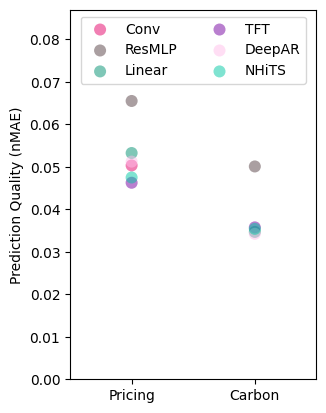

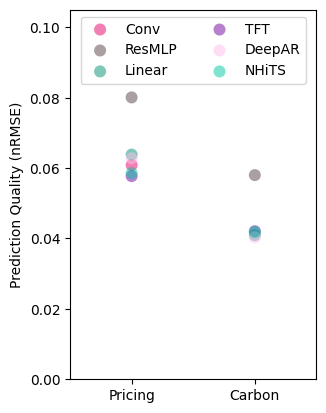

In [6]:
for metric, metric_name, ymax in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE'],[0.087,0.105]):
    fig, ax = plt.subplots()
    ax.set_box_aspect(1.5)
    for i,model in enumerate(models):
        ax.scatter(range(2),comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][columns[:2]],label=model_names[i],color=eeci_colors[i], alpha=0.5, edgecolors='none',s=75)
    plt.xticks(range(2),['Pricing','Carbon'])
    plt.ylim(0,ymax)
    plt.xlim(-0.5,1.5)
    plt.ylabel(f'Prediction Quality ({metric_name})')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True)
    plt.show()

Note `conv` is an outlier in how bad it is!

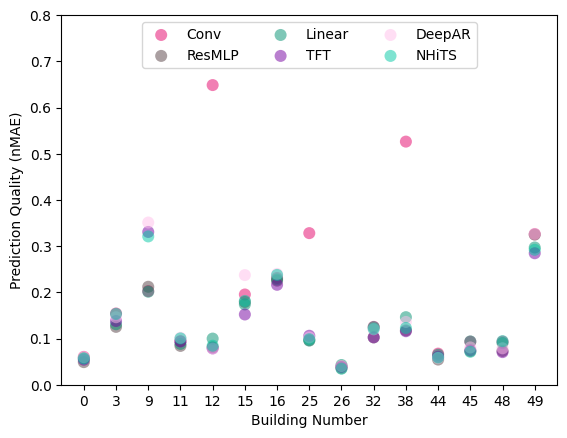

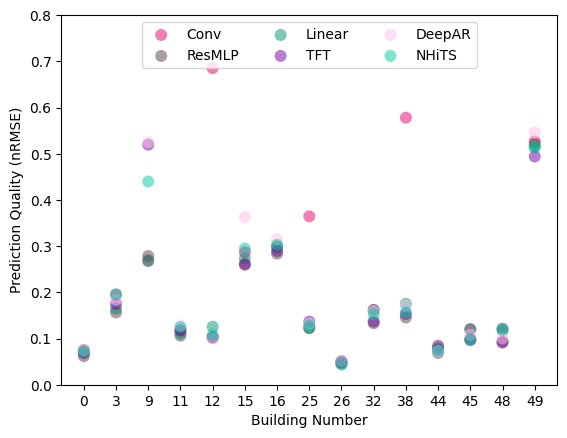

In [7]:
for metric, metric_name in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE']):
    fig, ax = plt.subplots()
    for i,model in enumerate(models):
        ax.scatter(range(len(UCam_ids)),comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][columns[2:]],label=model_names[i],color=eeci_colors[i], alpha=0.5, edgecolors='none',s=75)
    plt.xticks(range(len(UCam_ids)),UCam_ids)
    plt.ylim(0,0.8)
    plt.ylabel(f'Prediction Quality ({metric_name})')
    plt.xlabel('Building Number')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True)
    plt.show()

Compare EVALUATE performance

In [8]:
eval_file = os.path.join('..','results', 'evaluate_tests_same-train-test.csv')
eval_results = pd.read_csv(eval_file)

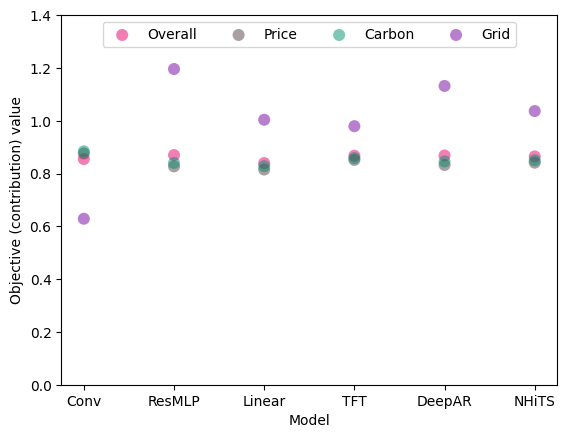

In [9]:
columns = ['Overall','Price','Carbon','Grid']

fig, ax = plt.subplots()
for i,col in enumerate(columns):
    ax.scatter(range(len(models)),[eval_results[col][eval_results['Model']==model] for model in models],label=col,color=eeci_colors[i], alpha=0.5, edgecolors='none',s=75)
plt.xticks(range(len(models)),model_names)
plt.xlabel('Model')
plt.ylim(0,1.4)
plt.ylabel(f'Objective (contribution) value')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fancybox=True)
plt.show()